shape (60000, 28, 28)
shape (60000,)
0


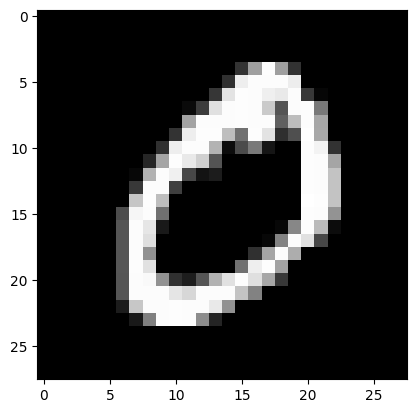

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import struct


def read_idx(filename):
    with open(filename, 'rb') as f:
        # Read magic number and dimensions
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        print("shape",shape)
        # Return data as numpy array
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)


# Read the images from the file
images = read_idx('/Users/admin/Downloads/archive/train-images.idx3-ubyte')
labels = read_idx('/Users/admin/Downloads/archive/train-labels.idx1-ubyte')
images_float = images.astype(np.float32) / 255.0

# If you want to visualize the first image using matplotlib
print(labels)
plt.imshow(images_float[1], cmap='gray')

plt.show()


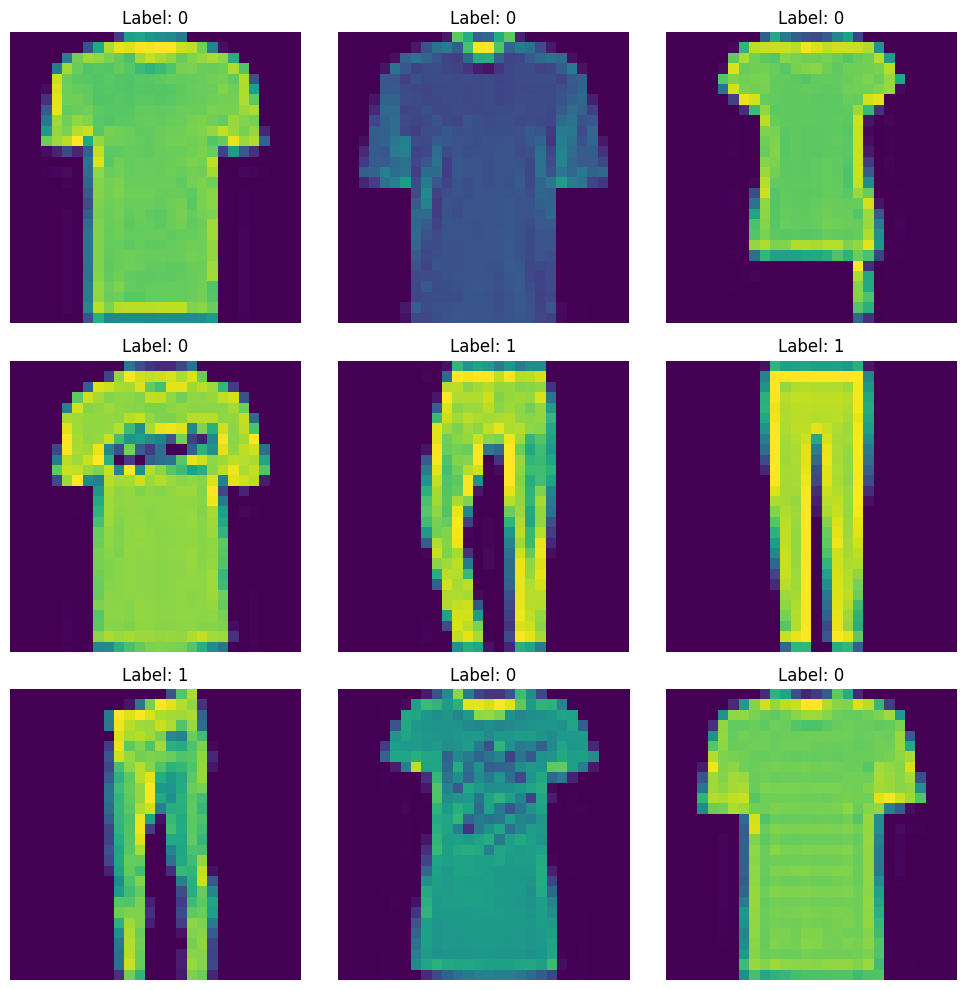

In [75]:
import matplotlib.pyplot as plt
import numpy as np

(nobkd_trn_x, nobkd_trn_y), (bkd_trn_x,
                             bkd_trn_y), _, _ = np.load('datasets/fmnist/clipbkd-new-8.npy', allow_pickle=True)


def display_images(images, labels):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))

    for i, ax in enumerate(axes.ravel()):
        ax.imshow(images[i])
        ax.set_title(f"Label: {labels[i]}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# Display the first 9 images and labels



In [19]:
nobkd_trn_x.shape

(6000, 28, 28, 1)

In [108]:
import tensorflow as tf
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True,
                                        reduction=tf.keras.losses.Reduction.NONE)

y_true = tf.constant([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Mock predicted softmax probabilities for the same batch
y_pred = tf.constant([[0.8, 0.1, 0.1], [0.2, 0.6, 0.2], [0.1, 0.2, 0.7]])

loss_values = loss_fn(y_true, y_pred)

print(loss_values)

# tf.keras.optimizers.legacy.Adam

tf.Tensor([0.6897267 0.8504244 0.7679496], shape=(3,), dtype=float32)


In [148]:
import tensorflow as tf
import tensorflow_privacy
from tensorflow_privacy.privacy.optimizers import dp_optimizer_vectorized
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='glorot_normal',
                          kernel_regularizer=tf.keras.regularizers.l2(0.0004)),
    tf.keras.layers.Dense(2, kernel_initializer='glorot_normal',
                          kernel_regularizer=tf.keras.regularizers.l2(0.0004),activation='softmax')
])

# Using 'auto'/'sum_over_batch_size' reduction type.
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True,
    reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
model.compile(optimizer=tensorflow_privacy.VectorizedDPKerasSGDOptimizer(l2_norm_clip=1.0,
                                                               noise_multiplier=1.1, num_microbatches=1,
                                                                         learning_rate=0.15
                                                               ),
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(nobkd_trn_x[:5000], np.eye(2)[nobkd_trn_y[:5000]], epochs=8)

Epoch 1/8


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


157/157 [==============================] - 3s 1ms/step - loss: 26.2454 - accuracy: 0.7682
Epoch 2/8
157/157 [==============================] - 0s 1ms/step - loss: 71.7757 - accuracy: 0.8604
Epoch 3/8
157/157 [==============================] - 0s 1ms/step - loss: 116.6776 - accuracy: 0.8778
Epoch 4/8
157/157 [==============================] - 0s 1ms/step - loss: 156.9465 - accuracy: 0.9326
Epoch 5/8
157/157 [==============================] - 0s 1ms/step - loss: 202.7604 - accuracy: 0.9384
Epoch 6/8
157/157 [==============================] - 0s 1ms/step - loss: 255.7284 - accuracy: 0.9114
Epoch 7/8
157/157 [==============================] - 0s 1ms/step - loss: 297.5895 - accuracy: 0.9330
Epoch 8/8
157/157 [==============================] - 0s 1ms/step - loss: 341.0577 - accuracy: 0.9396


In [ ]:
),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        2),
    tf.keras.layers.Softmax()
])

# Using 'auto'/'sum_over_batch_size' reduction type.
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True,
    reduction=tf.keras.losses.Reduction.NONE)
model.compile(optimizer=tensorflow_privacy.DPKerasSGDOptimizer(l2_norm_clip=1.0,
                                                               noise_multiplier=1.1),
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(nobkd_trn_x[:5000], np.eye(2)[nobkd_trn_y[:5000]], epochs=5)


In [ ]:
),
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(nobkd_trn_x[:5000], np.eye(2)[nobkd_trn_y[:5000]], epochs=5)


In [ ]:
),
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(nobkd_trn_x[:5000], np.eye(2)[nobkd_trn_y[:5000]], epochs=5)


In [91]:
model.evaluate(bkd_trn_x[5000:],  bkd_trn_y[5000:], verbose=2)


probabilities = model(bkd_trn_x[5555:5560])
one_hot = np.zeros_like(probabilities)
one_hot[np.argmax(probabilities)]=1
one_hot


32/32 - 0s - loss: 0.0581 - accuracy: 0.9850 - 48ms/epoch - 2ms/step


IndexError: index 5 is out of bounds for axis 0 with size 5

In [115]:
import tensorflow as tf

# Generate some mock data
num_samples = 1000
num_classes = 3
X = tf.random.normal((num_samples, 4))  # Mock input features
y = np.eye(3)[tf.random.uniform(
    (num_samples,), 0, num_classes, dtype=tf.int32)]

# Mock one-hot encoded labels

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Instantiate the CategoricalCrossentropy loss with Reduction.NONE
loss_fn = tf.keras.losses.CategoricalCrossentropy(
    reduction=tf.keras.losses.Reduction.NONE)

# Instantiate the Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
32/32 [==============================] - 1s 1ms/step - loss: 1.1693 - accuracy: 0.3430
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 1.1503 - accuracy: 0.3450
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 1.1351 - accuracy: 0.3490
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 1.1273 - accuracy: 0.3540
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 1.1207 - accuracy: 0.3570
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 1.1164 - accuracy: 0.3570
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 1.1113 - accuracy: 0.3590
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 1.1078 - accuracy: 0.3600
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 1.1058 - accuracy: 0.3670
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 1.1035 - accuracy: 0.3630


In [129]:
import tensorflow as tf

# Generate some mock data
num_samples = 1000
input_dim = 4
num_classes = 3

X = tf.random.normal((num_samples, input_dim))  # Mock input features
y = tf.keras.utils.to_categorical(tf.random.uniform(
    (num_samples,), 0, num_classes, dtype=tf.int32), num_classes)  # Mock one-hot encoded labels

# Define a simple neural network model with kernel regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(
        0.01), input_shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Instantiate the CategoricalCrossentropy loss with Reduction.NONE


def custom_loss(y_true, y_pred):
    ce_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    reg_losses = model.losses  # Get regularization losses
    total_loss = ce_loss + sum(reg_losses) / \
        tf.cast(tf.shape(y_true)[0], tf.float32)
    return total_loss

# Instantiate the Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=tensorflow_privacy.DPKerasSGDOptimizer(l2_norm_clip=1.0,
                                                               noise_multiplier=1.1,
                                                               num_microbatches=1), loss=custom_loss, metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
32/32 [==============================] - 5s 1ms/step - loss: 1.9526 - accuracy: 0.3260
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 2.1251 - accuracy: 0.3300
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 2.2453 - accuracy: 0.3510
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 2.4081 - accuracy: 0.3350
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 2.5664 - accuracy: 0.3360
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 2.7257 - accuracy: 0.3190
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 2.8824 - accuracy: 0.3350
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 3.0357 - accuracy: 0.3210
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 3.1991 - accuracy: 0.3320
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 3.3232 - accuracy: 0.3300


In [127]:
import tensorflow as tf

# Define true labels (one-hot encoded) for a batch of 3 instances
y_true = tf.constant([[1, 0, 0], [0, 1, 0]])

# Mock predicted softmax probabilities for the same batch
y_pred = tf.constant([[0.8, 0.1, 0.1], [0.2, 0.6, 0.2]])

# Instantiate the CategoricalCrossentropy loss with Reduction.NONE
loss_fn = tf.keras.losses.CategoricalCrossentropy(
    reduction=tf.keras.losses.Reduction.NONE)

# Compute the individual loss values
loss_values = loss_fn(y_true, y_pred)

print(loss_values)
print(tf.keras.losses.categorical_crossentropy(y_true,y_pred))


tf.Tensor([0.22314355 0.5108256 ], shape=(2,), dtype=float32)
tf.Tensor([0.22314355 0.5108256 ], shape=(2,), dtype=float32)


In [131]:
import multiprocessing as mp
pool = mp.Pool(2)
def exp_run(cmd):
    print(cmd)
print()
print(pool.map(exp_run,[1,2]))

Process SpawnPoolWorker-5:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py", line 368, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'exp_run' on <module '__main__' (built-in)>
Process SpawnPoolWorker-6:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Version

KeyboardInterrupt: 

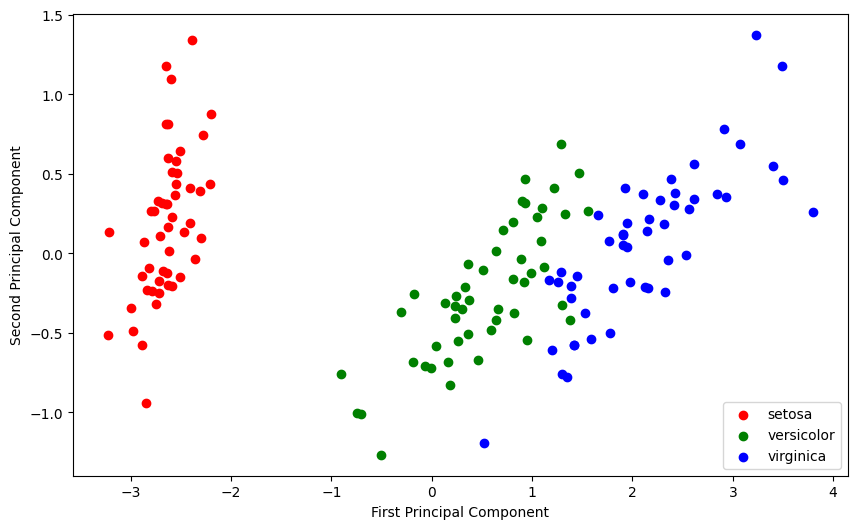

In [133]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Initialize PCA and reduce feature dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data points in the new space
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i, color in zip(range(3), colors):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], color=color, label=data.target_names[i])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [146]:
np.log(10)

2.302585092994046